# **Supervised Learning Models Explained Simply with Diagrams** 🎨🧠  

Supervised learning is like **teaching a kid with examples**. Imagine you’re teaching a robot how to guess car prices based on past data.  

---

## **1️⃣ Linear Regression (📈 A Straight Line Prediction)**  
Think of it like **drawing a straight line through data points** to see the trend.  

### **Example:**  
If mileage increases, price decreases. A straight line shows this relationship.  

### **Diagram:**  
```
Car Price ↑       *    
              *      *
         *       *       * 
   -----------------------> Mileage ↑
```
🚗 **It predicts prices smoothly!**  

---

## **2️⃣ Decision Tree (🌳 Step-by-Step Questions)**  
This model asks questions like a game of **20 Questions**.  

### **Example:**  
If the car is **new**, price is **high**. If **old**, check mileage. If **low mileage**, price is **medium**, etc.  

### **Diagram:**  
```
           🚗 Is the car new?
               /        \
            Yes         No
          High $    Mileage low?
                        /       \
                     Yes        No
                Medium $      Low $
```
🌲 **It's like a flowchart for decisions!**  

---

## **3️⃣ Random Forest (🌲🌲🌲 A Team of Trees)**  
Instead of one decision tree, **many trees** work together and vote for the best price.  

### **Example:**  
One tree might say **$5000**, another **$5200**, another **$4900**—the average is taken for accuracy.  

### **Diagram:**  
```
   🌳 Tree 1 → $5000
   🌳 Tree 2 → $5200
   🌳 Tree 3 → $4900
   -----------------
   🏆 Final Price → $5033
```
🤝 **More trees = Better accuracy!**  

---

## **4️⃣ Support Vector Regressor (📊 Finding the Best Fit with Boundaries)**  
Instead of a simple line, it finds the **best boundary** while ignoring some outliers.  

### **Example:**  
If some cars are **overpriced**, it ignores those extreme cases and finds a smooth trend.  

### **Diagram:**  
```
Car Price ↑  *    *    
              *    *      *
         *      *    *    *  
   -----------------------> Mileage ↑
   (SVR tries to fit a smooth boundary)
```
🔍 **It generalizes the pattern well!**  

---

## **In Short:**
✅ **Linear Regression** – A straight-line guess  
✅ **Decision Tree** – A step-by-step game of questions  
✅ **Random Forest** – A group of trees voting together  
✅ **Support Vector Regressor** – A smooth prediction while ignoring outliers  


# Car Price Analysis

## **Dataset Overview**
The dataset used in this analysis contains information about cars, including various features like `make`, `model`, `mileage`, `max_power`, and `selling_price`. The target variable is `selling_price`, which we aim to predict based on the other features.

![Dataset](https://github.com/Abd-al-RahmanH/supervised-learning/blob/main/images/4.png?raw=true)

### **What We Will Do**
1. **Data Understanding and Preprocessing**:
   - Load and clean the dataset.
   - Handle missing values and ensure data is ready for analysis.
   - Encode categorical variables, making them compatible with machine learning models.

2. **Machine Learning Model Training**:
   - Train multiple regression models (Linear Regression, Decision Tree, Random Forest, and SVR) to predict car prices.

3. **Evaluation and Comparison**:
   - Evaluate each model's performance using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R².
   - Identify the best-performing model.

4. **Visualization**:
   - Generate visualizations like bar charts for model performance, scatter plots for actual vs. predicted prices, and heatmaps for feature correlation.

### **Impact**
- Helps stakeholders understand which models work best for predicting car prices.
- Provides insights into which features most influence car prices, aiding in strategic decision-making.

---

## **Code Explanation**

### **1. Import Libraries**
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
```
- Libraries like `pandas`, `numpy`, and `matplotlib` are imported for data manipulation, analysis, and visualization. 
- **Impact:** Provides tools to handle and visualize data efficiently.

---

### **2. Load Dataset**
```python
df = pd.read_csv("carpricedata.csv")
```
- Loads the car price dataset.
- **Impact:** Ensures data is ready for processing.

---

### **3. Identify Categorical and Numerical Columns**
```python
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns
```
- Separates columns into categorical and numerical types.
- **Impact:** Helps apply appropriate transformations.

---

### **4. Handle Missing Values in `max_power`**
```python
df['max_power'] = df['max_power'].astype(str).str.strip()
df['max_power'] = df['max_power'].replace(r'^\s*$', np.nan, regex=True)
df['max_power'] = df['max_power'].replace(r'[\$,]', '', regex=True)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
```
- Cleans and converts `max_power` column to numeric, replacing empty or invalid values with NaN.
- **Impact:** Prepares the column for calculations.

---

### **5. Fill Missing Values**
```python
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
```
- Numerical columns are filled with mean values, and categorical columns are filled with the mode.
- **Impact:** Resolves missing data issues.

---

### **6. Encode Categorical Variables**
```python
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])
```
- Converts categorical data to numerical format using Label Encoding.
- **Impact:** Makes data compatible with machine learning models.

---

### **7. Define Target and Features**
```python
X = df.drop(columns=['selling_price'])
y = df['selling_price']
```
- `selling_price` is set as the target variable, while other columns are features.
- **Impact:** Prepares data for training models.

---

### **8. Train Machine Learning Models**
```python
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Predictions": y_pred
    }
```
- Models like Linear Regression, Decision Tree, Random Forest, and Support Vector Regressor are trained on the dataset.
- **Impact:** Provides multiple approaches to predict car prices.

---

### **9. Evaluate Models**
```python
metrics_df = pd.DataFrame(results).T.drop(columns=["Predictions"])
```
- Calculates and stores performance metrics (MSE, MAE, R²).
- **Impact:** Compares models for effectiveness.

---

### **10. Visualize Model Performance**

#### **Bar Chart:** Highlights model performance with R² scores.
```python
performance_scores = pd.DataFrame({
    "Model": metrics_df.index,
    "Performance Score (Higher is Better)": metrics_df["R2"] * 100,
})

performance_scores = performance_scores.sort_values(by="Performance Score (Higher is Better)", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Performance Score (Higher is Better)", data=performance_scores, palette="viridis")
plt.title("Model Performance (Higher = Better)")
plt.ylabel("Performance Score (%)")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()
```
![Model Performance](https://github.com/Abd-al-RahmanH/supervised-learning/blob/f323e6024661c6e6e711333003286da870edec72/images/1.png?raw=true)

### **Model Perfromance Summary**

![Model Performance](https://github.com/Abd-al-RahmanH/supervised-learning/blob/f323e6024661c6e6e711333003286da870edec72/images/5.png?raw=true)


#### **Scatter Plot:** Compares actual vs. predicted prices.
```python
plt.figure(figsize=(12, 6))
colors = ["blue", "green", "red", "purple"]
for (name, metrics), color in zip(results.items(), colors):
    plt.scatter(y_test, metrics["Predictions"], label=name, alpha=0.5, color=color)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="black")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Price Comparison")
plt.show()
```
![Actual vs Predicted](https://github.com/Abd-al-RahmanH/supervised-learning/blob/f323e6024661c6e6e711333003286da870edec72/images/2.png?raw=true)

---

### **11. Feature Correlation Heatmap**
```python
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Feature Correlation Heatmap")
plt.show()
```
![Heatmap](https://pfrw75d9xch13p7.studio.us-east-2.sagemaker.aws/studiolab/default/jupyter/files/sagemaker-studiolab-notebooks/3.png?_xsrf=2%7Cba8fbd66%7Cad7f853422ab24c2c23e5c0b36db6ca6%7C1739874523)

---

## **Impact**
- Predicts car prices effectively by comparing models.
- Visual insights (e.g., heatmaps, performance charts) help interpret results better.


/tmp/ipykernel_345/3979047039.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Performance Score (Higher is Better)", data=performance_scores, palette="viridis")


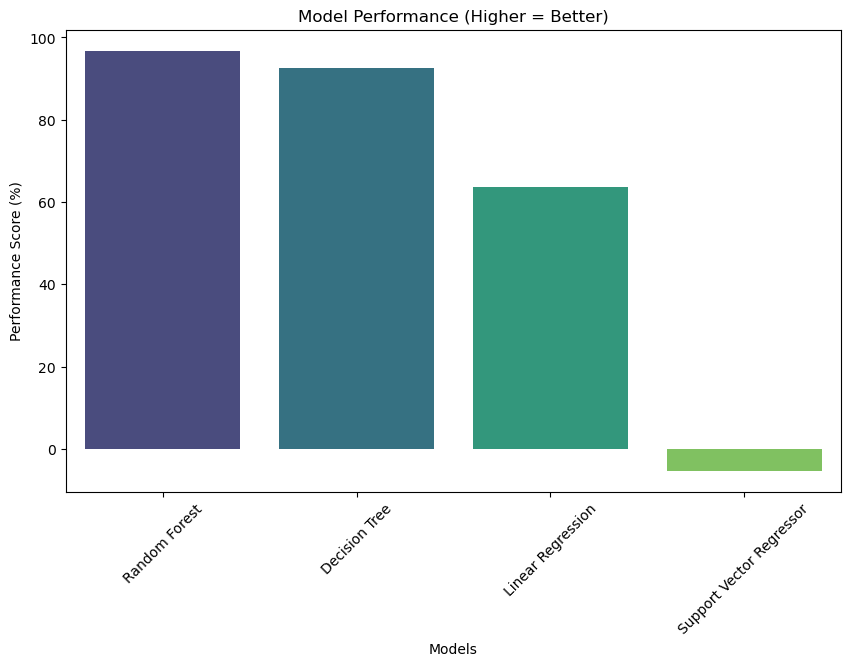


📊 Model Performance Summary:

+--------------------------+-------------+----------+------------+-------------------+
|                          |         MSE |      MAE |         R2 | Performance       |
+==========================+=============+==========+============+===================+
| Linear Regression        | 2.37947e+11 | 288361   |  0.636991  | Good              |
+--------------------------+-------------+----------+------------+-------------------+
| Decision Tree            | 4.88414e+10 |  79951.6 |  0.925488  | Excellent         |
+--------------------------+-------------+----------+------------+-------------------+
| Random Forest            | 2.11545e+10 |  66214.6 |  0.967727  | Excellent         |
+--------------------------+-------------+----------+------------+-------------------+
| Support Vector Regressor | 6.90173e+11 | 378746   | -0.0529208 | Needs Improvement |
+--------------------------+-------------+----------+------------+-------------------+


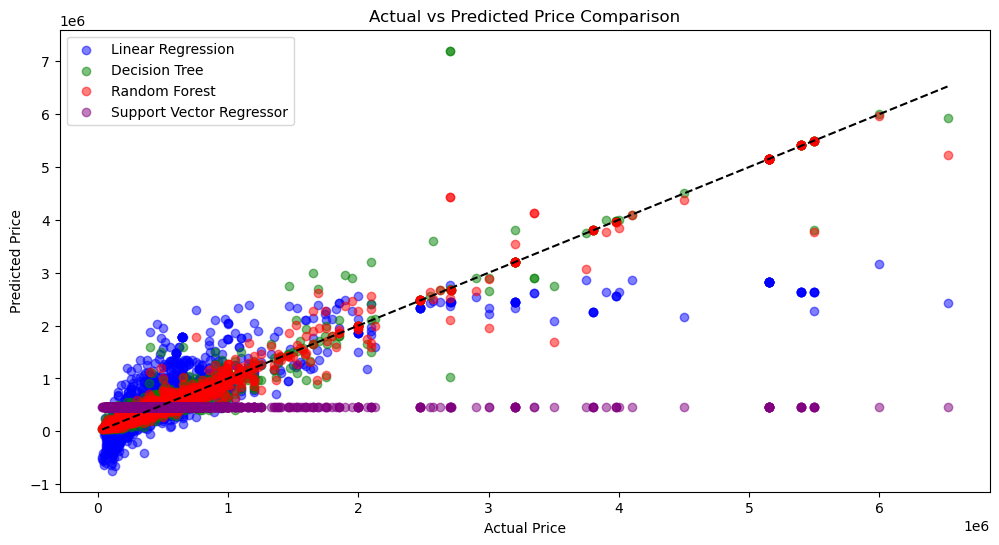

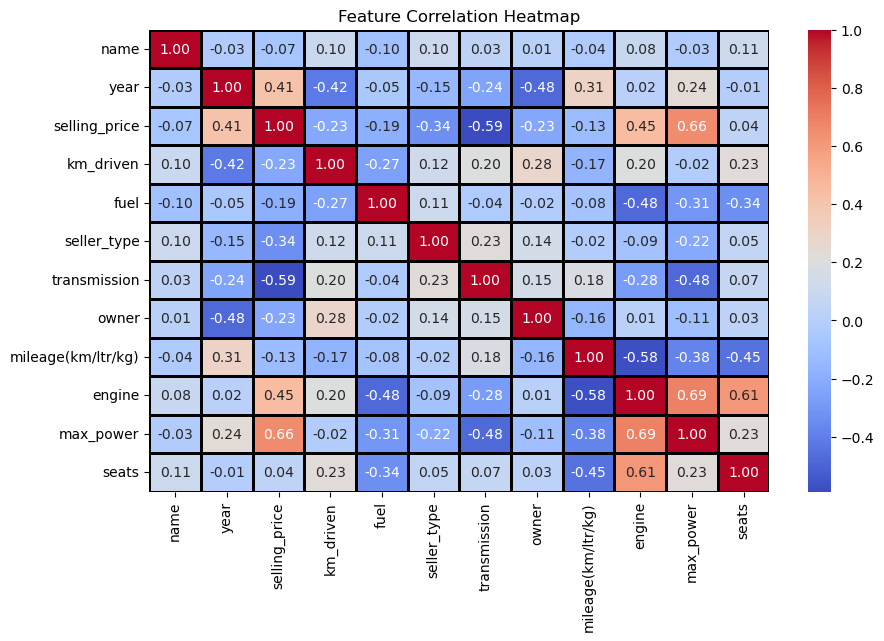

In [ ]:
### Code for the above explanation 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load dataset
df = pd.read_csv("carpricedata.csv")  # Ensure correct path

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Convert 'max_power' to numeric
df['max_power'] = df['max_power'].astype(str).str.strip()
df['max_power'] = df['max_power'].replace(r'^\s*$', np.nan, regex=True)
df['max_power'] = df['max_power'].replace(r'[\$,]', '', regex=True)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# Handle missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Encode categorical variables
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Define target and features
X = df.drop(columns=['selling_price'])
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Predictions": y_pred
    }

# Create a DataFrame for easy visualization
metrics_df = pd.DataFrame(results).T.drop(columns=["Predictions"])

# Add performance explanation
def performance_explanation(r2):
    if r2 > 0.8:
        return "Excellent"
    elif r2 > 0.6:
        return "Good"
    elif r2 > 0.4:
        return "Average"
    else:
        return "Needs Improvement"

metrics_df["Performance"] = metrics_df["R2"].apply(performance_explanation)

# Reverse R² (higher is better) and Errors (lower is better)
performance_scores = pd.DataFrame({
    "Model": metrics_df.index,
    "Performance Score (Higher is Better)": metrics_df["R2"] * 100,  # Scale R2 for better visualization
})

# Sort for better visualization (Random Forest should appear best)
performance_scores = performance_scores.sort_values(by="Performance Score (Higher is Better)", ascending=False)

# Create Bar Chart where Higher = Better Performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Performance Score (Higher is Better)", data=performance_scores, palette="viridis")
plt.title("Model Performance (Higher = Better)")
plt.ylabel("Performance Score (%)")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()

# Print Beautified Performance Table
print("\n📊 Model Performance Summary:\n")
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Actual vs. Predicted Price Comparison
plt.figure(figsize=(12, 6))
colors = ["blue", "green", "red", "purple"]
for (name, metrics), color in zip(results.items(), colors):
    plt.scatter(y_test, metrics["Predictions"], label=name, alpha=0.5, color=color)
    
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="black")  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Price Comparison")
plt.show()


# Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Feature Correlation Heatmap")
plt.show()



/tmp/ipykernel_115/2277256037.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Performance Score (Higher is Better)", data=performance_scores, palette="viridis")


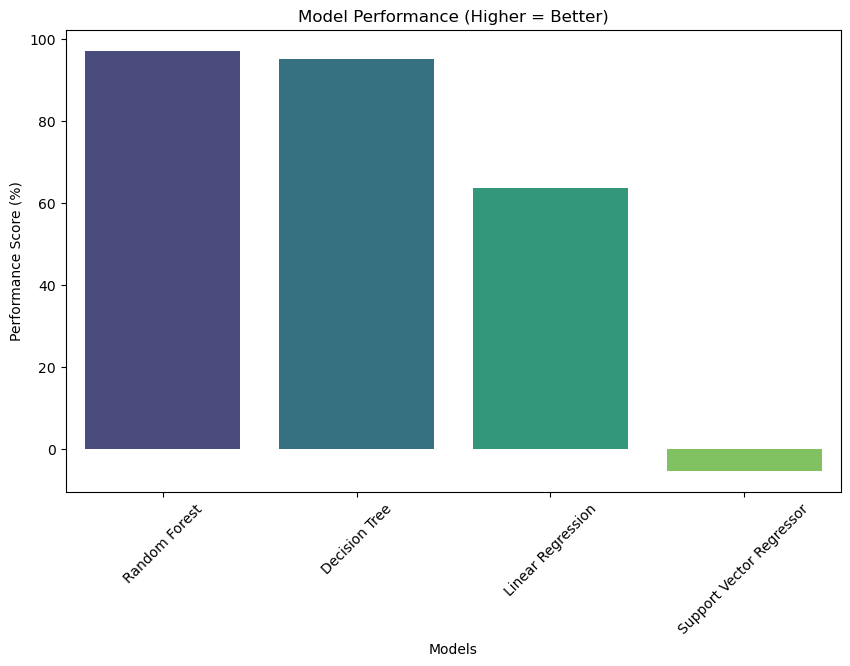


📊 Model Performance Summary:

+--------------------------+-------------+----------+------------+-------------------+
|                          |         MSE |      MAE |         R2 | Performance       |
+==========================+=============+==========+============+===================+
| Linear Regression        | 2.37947e+11 | 288361   |  0.636991  | Good              |
+--------------------------+-------------+----------+------------+-------------------+
| Decision Tree            | 3.26792e+10 |  78909.3 |  0.950145  | Excellent         |
+--------------------------+-------------+----------+------------+-------------------+
| Random Forest            | 1.8841e+10  |  65237.7 |  0.971256  | Excellent         |
+--------------------------+-------------+----------+------------+-------------------+
| Support Vector Regressor | 6.90173e+11 | 378746   | -0.0529208 | Needs Improvement |
+--------------------------+-------------+----------+------------+-------------------+


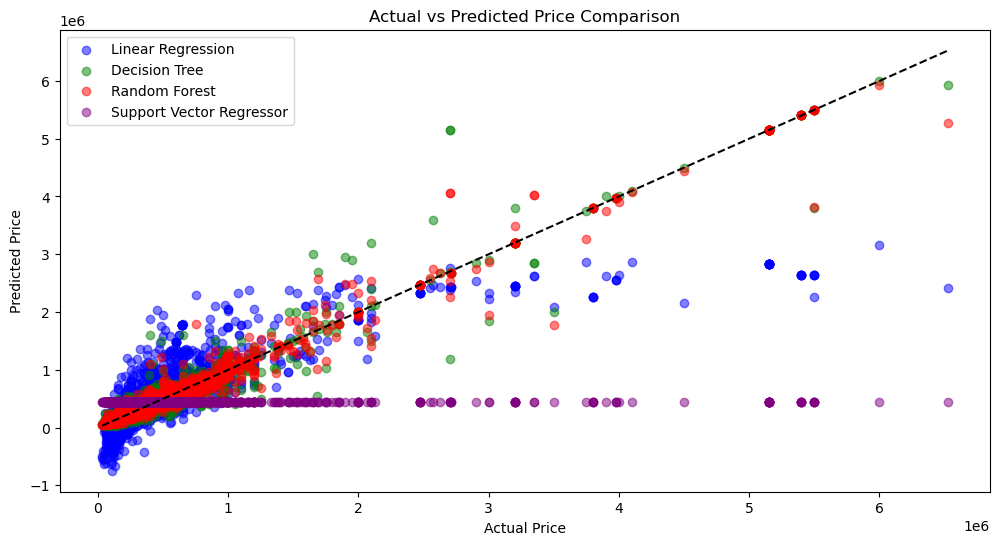

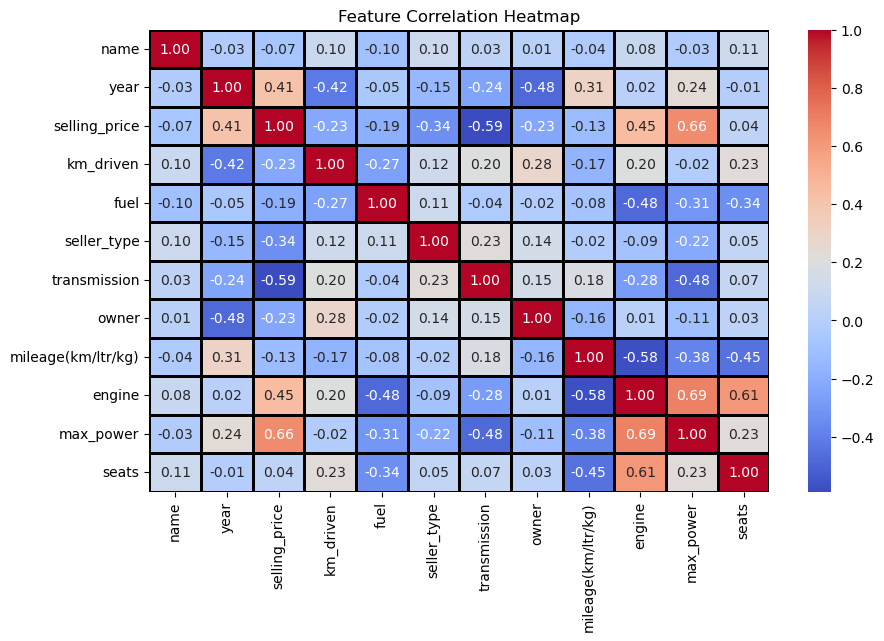

In [15]:
#with split test 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load dataset
df = pd.read_csv("carpricedata.csv")  # Ensure correct path

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Convert 'max_power' to numeric
df['max_power'] = df['max_power'].astype(str).str.strip()
df['max_power'] = df['max_power'].replace(r'^\s*$', np.nan, regex=True)
df['max_power'] = df['max_power'].replace(r'[\$,]', '', regex=True)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# Handle missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Encode categorical variables
label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Define target and features
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# Correct train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Predictions": y_pred
    }

# Create a DataFrame for easy visualization
metrics_df = pd.DataFrame(results).T.drop(columns=["Predictions"])

# Add performance explanation
def performance_explanation(r2):
    if r2 > 0.8:
        return "Excellent"
    elif r2 > 0.6:
        return "Good"
    elif r2 > 0.4:
        return "Average"
    else:
        return "Needs Improvement"

metrics_df["Performance"] = metrics_df["R2"].apply(performance_explanation)

# Reverse R² (higher is better) and Errors (lower is better)
performance_scores = pd.DataFrame({
    "Model": metrics_df.index,
    "Performance Score (Higher is Better)": metrics_df["R2"] * 100,  # Scale R2 for better visualization
})

# Sort for better visualization (Random Forest should appear best)
performance_scores = performance_scores.sort_values(by="Performance Score (Higher is Better)", ascending=False)

# Create Bar Chart where Higher = Better Performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Performance Score (Higher is Better)", data=performance_scores, palette="viridis")
plt.title("Model Performance (Higher = Better)")
plt.ylabel("Performance Score (%)")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()

# Print Beautified Performance Table
print("\n📊 Model Performance Summary:\n")
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Actual vs. Predicted Price Comparison
plt.figure(figsize=(12, 6))
colors = ["blue", "green", "red", "purple"]
for (name, metrics), color in zip(results.items(), colors):
    plt.scatter(y_test, metrics["Predictions"], label=name, alpha=0.5, color=color)
    
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="black")  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Price Comparison")
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="black")
plt.title("Feature Correlation Heatmap")
plt.show()
